# <b>House price analysis</b>
Lets start by analysing the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
train_data = pd.read_csv('../data/train.csv', delimiter=',').drop(['Id'], axis=1)
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [3]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Lets look at the distribution of the <i>sales price</i>.

/Users/jessica/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


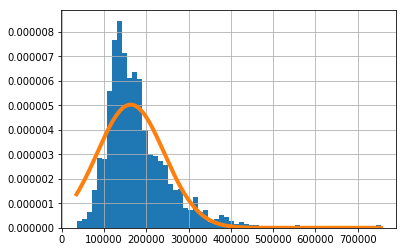

In [5]:
train_sales_price_sorted = train_data['SalePrice'].sort_values()
train_sales_price_sorted.hist(bins=60, normed=True)
sales_price_normal_dist = stats.norm.pdf(train_sales_price_sorted, np.median(train_sales_price_sorted),
               np.std(train_sales_price_sorted))
plt.plot(train_sales_price_sorted, sales_price_normal_dist, linewidth=4)
plt.rcParams['figure.figsize'] = [16,8]
plt.show()

Dosplay correlation betwwn columns in the data.

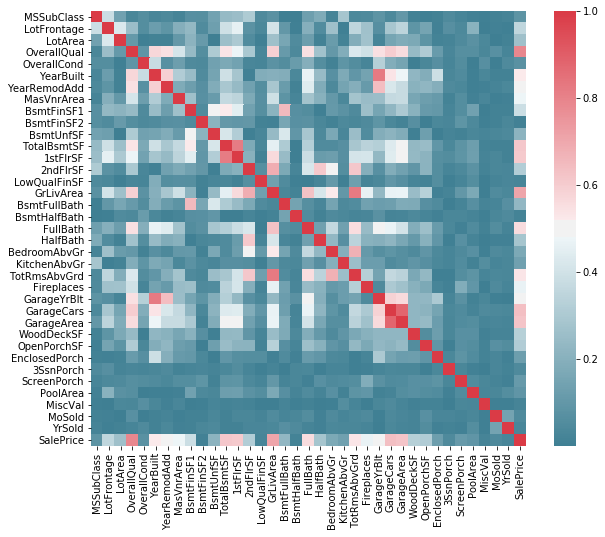

In [6]:
data_corr = train_data.corr().abs()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

/Users/jessica/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2790: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


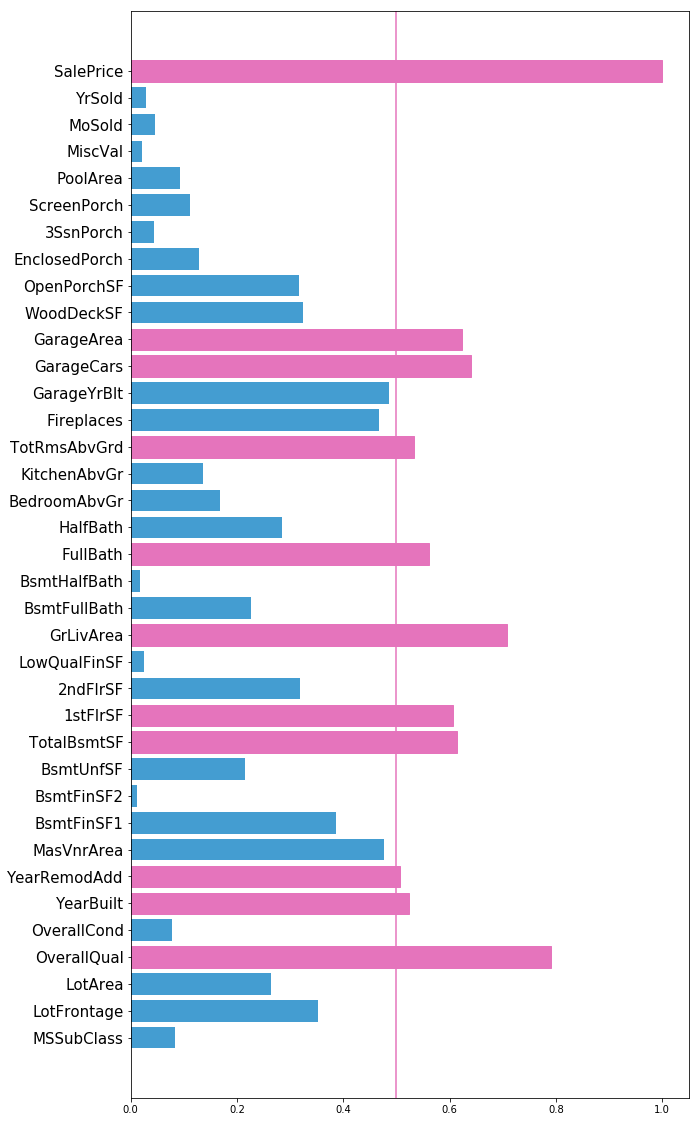

In [8]:
sale_price = data_corr['SalePrice'].values
row_names = pd.Series([row_name for row_name in data_corr['SalePrice'].index])

barlist=plt.barh(bottom=np.arange(len(sale_price)),
       width=sale_price,
       tick_label=row_names, color='#449DD1')

corr_high = np.arange(len(sale_price))[sale_price >= 0.5]
for i in corr_high:
    barlist[i].set_color('#E574BC')

plt.yticks( size=15)
#plt.tick_params(colors='b')
plt.axvline(x=0.5, ymin=0, ymax=1, hold=None, color='#E574BC')
plt.rcParams['figure.figsize'] = [10,20]

plt.show()

# Columns correlating to Sale Price are:

In [10]:
important_columns = [col for col in data_corr.loc[:, data_corr['SalePrice'] >= 0.5].columns]
train_data.loc[:, important_columns].head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


# Continue with columns that has corr >= 0.5 to SalePrice.

In [16]:
important_columns_data = train_data.loc[:, important_columns]

In [18]:
linear_corr_important_col = important_columns_data.corr().abs()

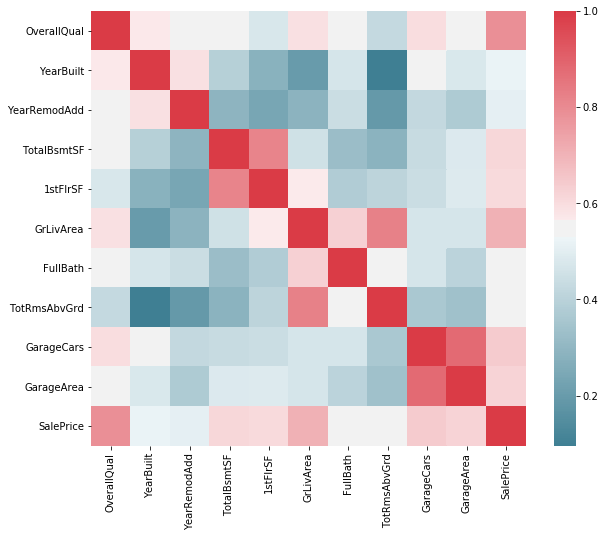

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(linear_corr_important_col, mask=np.zeros_like(linear_corr_important_col, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

## Try training Ridge Regression, Lasso, Elastic Net adn Nearest Neighbour on this part of the dataset

In [34]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

split_on_row = int(0.8*important_columns_data.shape[0])
important_columns_data_train = important_columns_data.iloc[:split_on_row, :]
important_columns_data_test = important_columns_data.iloc[split_on_row:, :]
print(important_columns_data_train.shape)
print(important_columns_data_test.shape)

(1168, 11)
(292, 11)


In [42]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(important_columns_data_train.drop(axis=1, columns=['SalePrice']), important_columns_data_train['SalePrice'])
ridge_prediction = ridge_model.predict(important_columns_data_test.drop(axis=1, columns=['SalePrice']))
r2_score(important_columns_data_test['SalePrice'], ridge_prediction)



0.6306554848941475